### Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split

In [2]:
sns.set_style('darkgrid')

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/KennedyRMenezes/DataScience/refs/heads/master/Datasets/Preco_casas/Pre%C3%A7os_de_casas.csv")

### Significado das colunas do Data Set

- area_primeiro_andar: Refere-se à área do primeiro andar da propriedade, medida em metros quadrados.

- existe_segundo_andar: Esta variável é binária, indicando se a propriedade possui ou não um segundo andar.
  - Pode ser representada como 1 para "sim" e 0
para "não".

- area_segundo_andar: Se a propriedade tiver um segundo andar, esta variável representa a área total do segundo andar, medida em metros quadrados.

- quantidade_banheiros: Indica o número total de banheiros na propriedade.

- capacidade_carros_garagem: Esta variável indica a capacidade da garagem da casa

- propriedade, ou seja, o número máximo de carros que podem ser estacionados na garagem.

- qualidade_da_cozinha_Excelente: Esta é uma variável categórica que avalia a qualidade da cozinha na propriedade.
 - Se a cozinha for considerada "Excelente" é representada por 1, e caso contrário, por 0.

- preco_de_venda: Este é o preço de venda da propriedade em reais. É a variável alvo que se tenta prever usando os outros atributos da propriedade.

### Exploração e Tratamento

In [4]:
df.head()

,Id,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,preco_de_venda
0,1,79.5224,1,79.3366,2,548,0,1027905.0
1,2,117.2398,0,0.0000,2,460,0,894795.0
2,3,85.4680,1,80.4514,2,608,0,1101855.0
3,4,89.2769,1,70.2324,1,642,0,690200.0
4,5,106.3705,1,97.8237,2,836,0,1232500.0


In [5]:
df.describe()

,Id,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,preco_de_venda
count,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1.438000e+03
mean,730.939499,106.602556,0.431154,31.888410,1.556328,470.381780,0.065369,8.802488e+05
std,422.336441,33.040598,0.495410,39.952846,0.542512,211.875916,0.247261,3.697203e+05
min,1.000000,31.028600,0.000000,0.000000,0.000000,0.000000,0.000000,1.720570e+05
25%,364.250000,81.682325,0.000000,0.000000,1.000000,326.000000,0.000000,6.384350e+05
50%,733.500000,100.332000,0.000000,0.000000,2.000000,477.500000,0.000000,7.980438e+05
75%,1096.750000,127.458800,1.000000,67.631200,2.000000,576.000000,0.000000,1.045160e+06
max,1460.000000,223.145800,1.000000,168.892200,3.000000,1390.000000,1.000000,3.081250e+06


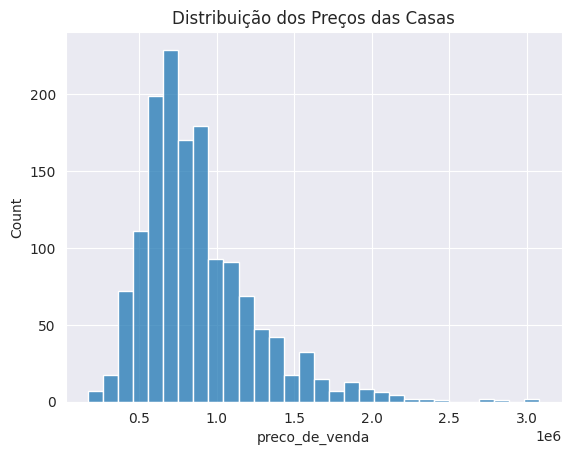

In [6]:
sns.histplot(data=df, x='preco_de_venda', bins=30)
plt.title('Distribuição dos Preços das Casas')
plt.show()

<Axes: >

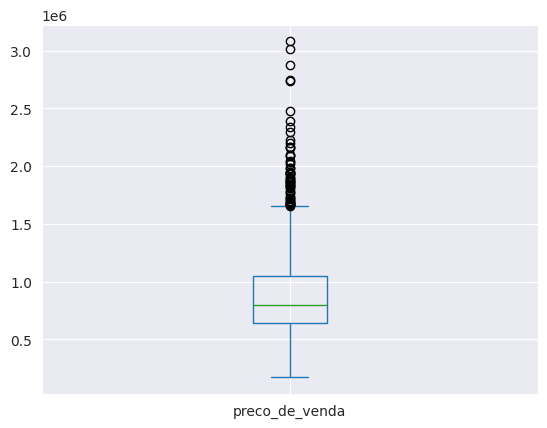

In [7]:
df['preco_de_venda'].plot(kind="box")

In [8]:
Q1 = df['preco_de_venda'].quantile(0.25)
Q3 = df['preco_de_venda'].quantile(0.75)
IQR = Q3 - Q1

# Limites inferior e superior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar os dados sem outliers
df_sem_outliers = df[(df['preco_de_venda'] >= limite_inferior) & (df['preco_de_venda'] <= limite_superior)]
print(len(df) -len(df_sem_outliers))


59


<Axes: >

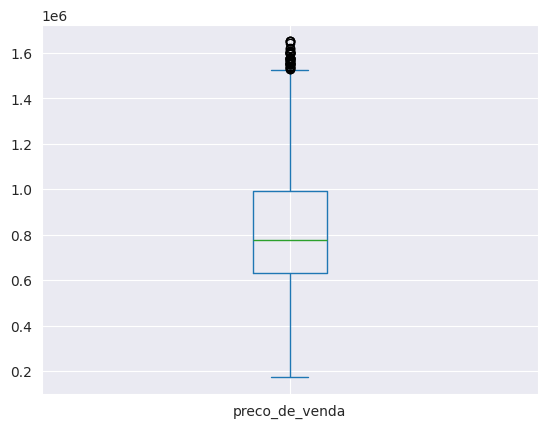

In [9]:
df_sem_outliers['preco_de_venda'].plot(kind="box")

In [10]:
df = df_sem_outliers.reset_index(drop=True)

Coluna 'capacidade_carros_garagem' veio na casa das centenas com milhar, dividi por 100 para fazer mais sentido.

In [11]:
# Essa alteração não fez diferença nas métricas do sistema.
# df['capacidade_carros_garagem'] = [int(x/100) for x in df['capacidade_carros_garagem']]

Fiz uma combinação de coluna para, talvez depois, retirar area primeiro e segundo andar.

In [12]:
df["area_total"] = df["area_primeiro_andar"] + df["area_segundo_andar"]

Renomeando colunas

In [13]:
df.rename(columns={'area_primeiro_andar': 'area_1_andar',
                   'existe_segundo_andar': 'segundo_andar',
                   'area_segundo_andar': 'area_2_andar',
                   'quantidade_banheiros': 'num_banheiros',
                   'capacidade_carros_garagem': 'capacidade_garagem',
                   'qualidade_da_cozinha_Excelente': 'qualidade_cozinha'}, inplace=True)

Verificando a distribuição das colunas numéricas

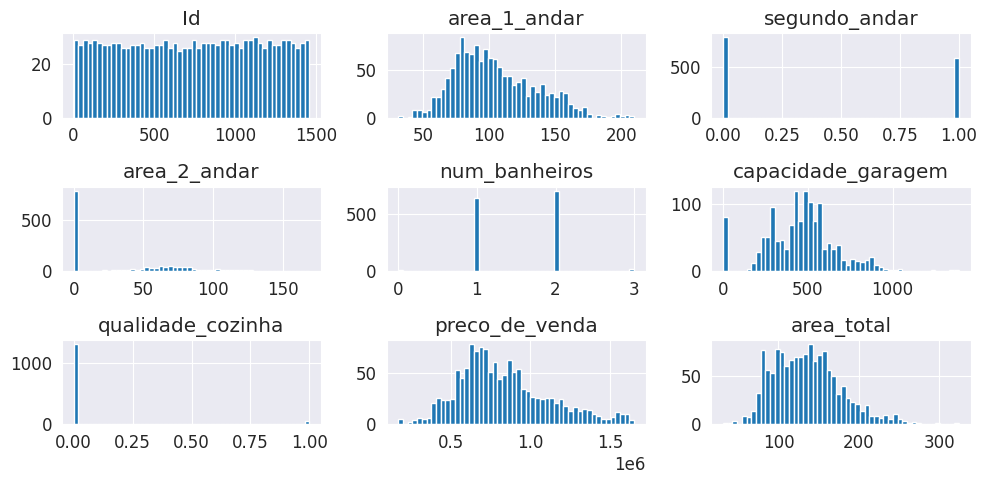

In [14]:
plt.rc('font', size=12)
df.hist(bins=50, figsize=(10,5))
plt.tight_layout()
plt.show()

### Criando o conjunto de testes

Criando o conjunto de testes estratificado, pois poucos dados.

### Analisando a estratificação

Antes de criar o conjunto de testes seria interessante descobrir o atributo que possui mais correlação com a variável dependente e então estratificar por essa variável.

In [15]:
df = df.drop(columns=['area_1_andar', 'area_2_andar', "Id"])
df

,segundo_andar,num_banheiros,capacidade_garagem,qualidade_cozinha,preco_de_venda,area_total
0,1,2,548,0,1027905.00,158.8590
1,0,2,460,0,894795.00,117.2398
2,1,2,608,0,1101855.00,165.9194
3,1,1,642,0,690200.00,159.5093
4,1,2,836,0,1232500.00,204.1942
...,...,...,...,...,...,...
1374,1,2,460,0,862750.00,153.0063
1375,0,2,500,0,1035300.00,192.5817
1376,1,2,252,0,1313845.00,217.3860
1377,0,1,240,0,700676.25,100.1462


In [16]:
df_corr_preco = df.corr()['preco_de_venda'].sort_values(ascending=False)
df_corr_preco

,preco_de_venda
preco_de_venda,1.000000
area_total,0.699198
capacidade_garagem,0.611040
num_banheiros,0.576560
qualidade_cozinha,0.319723
segundo_andar,0.153808


Podemos verificar que area_total tem a maior correlação com o preco_de_venda, então fazer uma estratificação para podermos fazer o conjunto testes representativo.

Mas antes disso, seria interessante retirar as colunas de area_primeiro_andar e area_segundo_andar já que area_total é composta por essas duas.

Fazendo a estratificação

In [17]:
df['area_total'].describe()

,area_total
count,1379.000000
mean,135.070267
std,41.660571
min,31.028600
25%,103.211900
50%,132.661200
75%,159.788000
max,324.499700


In [18]:
print("Amplitude: ", ( df['area_total'].max() - df['area_total'].min() ) / 5)
estrat = list(np.arange(31, 336, 80))
# remove ultimo elemento para colocar inf
estrat.pop(-1)
estrat.append(np.inf)
# adiciona limite inferior de zero
estrat.insert(0,0)
print("Limites para a estratificação: ", estrat)

Amplitude:  58.694219999999994
Limites para a estratificação:  [0, np.int64(31), np.int64(111), np.int64(191), inf]


In [19]:
df['area_categoria'] = pd.cut(df['area_total'],
                              bins=estrat,
                              labels=[1,2,3,4])

<Axes: >

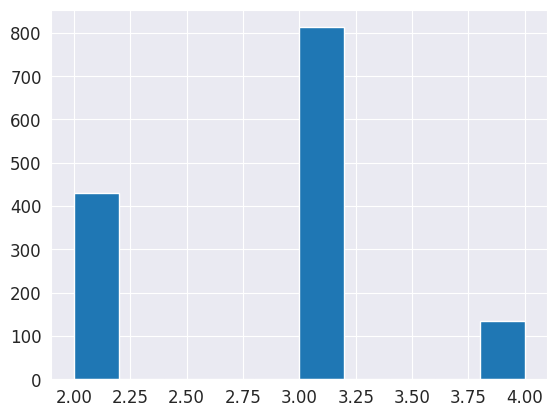

In [20]:
df['area_categoria'].hist()

### Verificando a proporção da estratificação

Vamos verificar a proporção

In [21]:
unique_vals_cat = df['area_categoria'].unique()

total = len(df['area_categoria'])

for i in unique_vals_cat:
  count_val = (df['area_categoria'] == i).sum()
  print(round(count_val/total, 2)*100)

# Outra maneira de verificar as proporções
# prop = df['area_categoria].value_counts(normalize=True)

59.0
10.0
31.0


### Construção do teste estratificado

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=101)

for train_index, test_index in splitter.split(df, df['area_categoria']):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

In [23]:
strat_test_set['area_categoria'].value_counts() / len(strat_test_set)

,count
area_categoria,
3,0.589372
2,0.311594
4,0.099034
1,0.000000


Comparação entre uma separação estratificada e uma não estratificada

In [24]:
def area_proportion(data):
  return data['area_categoria'].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size=0.3, random_state=101)

compare_props = pd.DataFrame({
    "Overall %": area_proportion(df),
    "Stratified %": area_proportion(strat_test_set),
    "Random %": area_proportion(test_set),
}).sort_index()

compare_props.index.name = "Area Categoria"
compare_props['Strat. Error %'] = (compare_props['Stratified %'] / compare_props['Overall %'] - 1)
compare_props['Rand. Error %'] = (compare_props['Random %'] / compare_props['Overall %'] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Area Categoria,,,,,
1,0.00,0.00,0.00,NaN,NaN
2,31.25,31.16,31.64,-0.30,1.24
3,58.96,58.94,60.39,-0.03,2.43
4,9.79,9.90,7.97,1.16,-18.58


In [25]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop('area_categoria', axis=1, inplace=True)

### Preparando dados para Machine Learning

In [26]:
casa = strat_train_set.drop("preco_de_venda", axis=1)
casa_target = strat_train_set["preco_de_venda"].copy()

In [27]:
casa

,segundo_andar,num_banheiros,capacidade_garagem,qualidade_cozinha,area_total
400,0,1,297,0,111.1084
77,1,2,509,0,198.9918
683,0,1,264,0,106.2776
564,1,1,544,0,127.7375
876,0,1,528,0,69.3963
...,...,...,...,...,...
674,0,2,768,1,157.7442
900,1,2,484,0,131.5464
591,0,1,520,0,125.4150
1009,1,1,240,0,161.6460


Usando Imputer para colocar a mediana nos dados.

Usando Standardize para normalizar os dados em uma escala semelhante.

Usando Pipeline para agregar as trasnformações.

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

In [29]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('standardize', StandardScaler()),
])

In [30]:
from sklearn import set_config

set_config(display='diagram')

num_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

### Selecionando e Treinando um Modelo


#### Training and Evaluating on the Training Set

In [31]:
from sklearn.linear_model import LinearRegression
lin_reg = make_pipeline(num_pipeline, LinearRegression())
lin_reg.fit(casa, casa_target)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                 ('standardize', StandardScaler())])),
                ('linearregression', LinearRegression())])

In [32]:
casa_pred = lin_reg.predict(casa)
casa_pred[:5].round(-2)

array([ 669300., 1061200.,  637800.,  708300.,  599300.])

Comparar com com os valores reais

In [33]:
casa_target.iloc[:5].values

array([685270., 953955., 647802., 695130., 393907.])

### Avaliando as diferenças e métricas

In [39]:
for i, j in zip(casa_pred[:5].round(-2), casa_target.iloc[:5].values):
    print("diferença:", np.abs(i - j))

diferença: 15970.0
diferença: 107245.0
diferença: 10002.0
diferença: 13170.0
diferença: 205393.0


In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(casa_target, casa_pred)
mse = mean_squared_error(casa_target, casa_pred)
r2 = r2_score(casa_target, casa_pred)

print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {np.sqrt(mse):.2f}")
print(f"R²:   {r2:.2f}")

MAE:  113897.53
MSE:  25418536008.97
RMSE: 159431.92
R²:   0.68


Medidas alterando dataset

In [ ]:
# COM OUTLIERS
# MAE:  128623.76
# MSE:  35263641927.25
# RMSE: 187786.16
# R²:   0.74

# SEM OUTLIERS
# MAE:  113897.53
# MSE:  25418536008.97
# RMSE: 159431.92
# R²:   0.68

# SEM OUTLIERS e SEM COLUNA qualidade_cozinha
# MAE:  116967.42
# MSE:  27390637342.55
# RMSE: 165501.17
# R²:   0.66

# SEM OUTLIERS E SÓ COM COLUNAS DE area_total E preco_de_venda
# MAE:  152440.04
# MSE:  41667095889.14
# RMSE: 204125.20
# R²:   0.48

Histograma de Resíduos

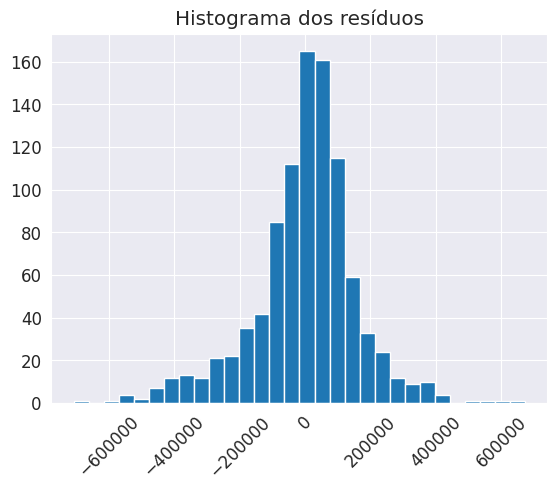

In [41]:
residuos = casa_target - casa_pred

plt.hist(residuos, bins=30)
plt.title('Histograma dos resíduos')
plt.xticks(rotation=45)
plt.show()

Presença de Heterocedasticidade pode comprometer o modelo, já que para valores acima de 1M e erro cresce.

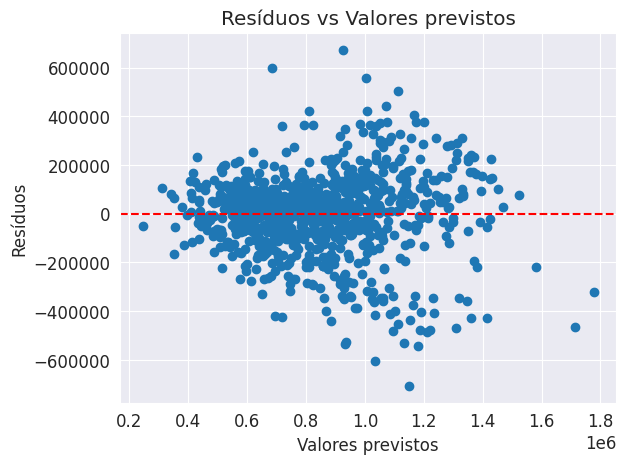

In [42]:
plt.scatter(casa_pred, residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores previstos')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Valores previstos')
plt.show()


In [45]:
from sklearn.model_selection import cross_val_score

In [47]:
lin_rmses = -cross_val_score(lin_reg, casa, casa_target,
                             scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_rmses).describe()

,0
count,10.000000
mean,159847.986984
std,21075.583560
min,126700.785461
25%,143639.678962
50%,164056.752645
75%,172045.477881
max,195129.394751


Modelo de Regressão Linear mais consistente.

### Rodando o conjunto de testes.

In [57]:
X_test = strat_test_set.drop("preco_de_venda", axis=1)
y_test = strat_test_set["preco_de_venda"].copy()

169445.11398343486


In [58]:
lin_rmses = -cross_val_score(lin_reg, X_test, y_test,
                             scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_rmses).describe()

,0
count,10.000000
mean,162968.720260
std,17688.195536
min,134777.732054
25%,154240.965407
50%,164206.411037
75%,170900.483294
max,190611.793703


Normal o erro aqui ser um pouco maior já que são dados não vistos.